## Regressão linear

In [1319]:
import numpy as np
import pandas as pd
import sklearn.feature_selection as fs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [1320]:
def daterange(start_date, end_date):
    for i in range(int((end_date - start_date).days)):
         yield start_date + datetime.timedelta(i)

## Exemplo com Adamantina

In [1321]:
#trocar para o cod_ibge de acordo com a cidade desejada
cidade = '3518404'

### Modelo para Casos

In [1322]:
dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
dataframe

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,GUARATINGUETÁ,3518404.0,122505.0,0.000000,0.287895,0.000000,0.066408,0.000000,0.252651,2021-02-21,0.081967,0.000000,0.176692,0.130435,0.167532,0.397790,0.0
1,1,GUARATINGUETÁ,3518404.0,122505.0,0.002660,0.012868,0.000000,0.000000,0.002660,0.011293,2021-02-22,0.163934,0.142857,0.139098,0.130435,0.164937,0.287293,0.0
2,2,GUARATINGUETÁ,3518404.0,122505.0,0.004445,0.012917,0.000000,0.001301,0.004445,0.011336,2021-02-23,0.163934,0.142857,0.142857,0.173913,0.179642,0.000000,0.0
3,3,GUARATINGUETÁ,3518404.0,122505.0,0.005253,0.005969,0.000000,0.000158,0.005253,0.005239,2021-02-24,0.180328,0.142857,0.165414,0.173913,0.161188,0.535912,0.0
4,4,GUARATINGUETÁ,3518404.0,122505.0,0.006229,0.005969,0.000000,0.000863,0.006229,0.005239,2021-02-25,0.163934,0.142857,0.154135,0.217391,0.152249,0.132597,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,GUARATINGUETÁ,3518404.0,122505.0,0.981918,0.964380,0.851982,0.972965,0.981918,0.950620,2021-07-15,0.032787,0.000000,0.022556,0.043478,0.228950,0.453039,0.0
145,145,GUARATINGUETÁ,3518404.0,122505.0,0.988568,0.985321,0.995440,0.987941,0.988568,0.986560,2021-07-16,0.032787,0.000000,0.011278,0.043478,0.072953,0.066298,0.0
146,146,GUARATINGUETÁ,3518404.0,122505.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021-07-17,0.114754,0.000000,0.037594,0.043478,0.074971,0.497238,0.0
147,147,GUARATINGUETÁ,3518404.0,122505.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021-07-18,0.032787,0.000000,0.037594,0.043478,0.022780,0.397790,0.0


### *Seleção de atributos*

In [1323]:
#usado para determinar o tamanho do conjunto de validação
tam = 30

dataframe = dataframe.set_index(['data'])
dataframe.index = pd.to_datetime(dataframe.index)
dataframe = dataframe.drop(columns=['Município', 'Código IBGE', 'Populacao', 'Unnamed: 0'])
val = dataframe[dataframe.shape[0]-tam-1:]

dataframe = dataframe[:-tam]

test_ratio = 0.2
X = dataframe.drop(columns=['diagnostico_covid19'])
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = dataframe['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)

In [1324]:
sel = fs.VarianceThreshold()
y = dataframe['diagnostico_covid19']

test_ratio = 0.5

menor = 99

for i in range(11, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=test_ratio, shuffle=False)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    pred = linear.predict(X_test)
    score = mean_squared_error(y_test, pred)
    if score < menor:
        menor = score
        resul = X_sel
    print("Score com k = {} -> {}" .format(i, score))
    
print(resul)

Score com k = 11 -> 0.01621990281549658
Score com k = 10 -> 0.0168024517373207
Score com k = 9 -> 0.019399471150652235
Score com k = 8 -> 0.024422907010649163
Score com k = 7 -> 0.026801800354576865
Score com k = 6 -> 0.0185433680744064
Score com k = 5 -> 0.018321109385237445
Score com k = 4 -> 0.01832110938523743
Score com k = 3 -> 0.01832110938523747
Score com k = 2 -> 0.1056263183081938
Score com k = 1 -> 0.11494647903303917
[[0.         0.2878951  0.06640815 ... 0.16753172 0.39779006 0.        ]
 [0.00266011 0.01286819 0.         ... 0.16493656 0.28729282 0.        ]
 [0.00444474 0.01291712 0.00130069 ... 0.17964245 0.         0.        ]
 ...
 [0.57970234 0.81250612 0.61529952 ... 0.73875433 0.06629834 0.        ]
 [0.6103778  0.81387611 0.6377881  ... 0.64532872 0.3480663  0.        ]
 [0.6167082  0.8140229  0.64239522 ... 0.64446367 0.48066298 0.        ]]


In [1325]:
# sendo a média móvel de casos o melhor atributo, iniciando os testes

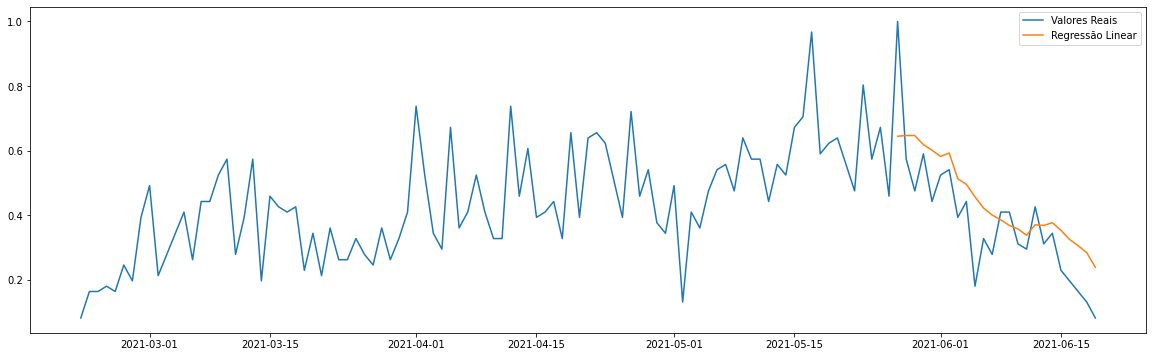

Erro quadrático
0.017670744462024997


In [1326]:
df = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
tam = 30
df = df.set_index(['data'])
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Município', 'Código IBGE', 'Populacao'])

val = df[df.shape[0]-tam-1:]

df = df[:-tam]

test_ratio = 0.2

X = dataframe[['media_movel_casos']]
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = df['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred']))

### Deslocando os últimos dias

In [1327]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_casos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [1328]:
for dias in range(0, 15):
    menor2 = 99
    meor3= 99
    tam = 30
    test_ratio = 0.2
    
    dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
    df_generated = generate_time_lags(dataframe, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_casos']
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)
    h = mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])
    if(h < menor2):
        menor2 = h
        menor3 = dias
    print(str(dias) + " -> "+ str(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])))



0 -> 0.017670744462024997
1 -> 0.007446164227553377
2 -> 0.007760299112234602
3 -> 0.00811097018650888
4 -> 0.007944311351288693
5 -> 0.007890794795325123
6 -> 0.008624169139924767
7 -> 0.0086462432902585
8 -> 0.004925976785805902
9 -> 0.005105574412171917
10 -> 0.005273053275656602
11 -> 0.005216019080389957
12 -> 0.005715208225216356
13 -> 0.00592267010565966
14 -> 0.006065319467546289


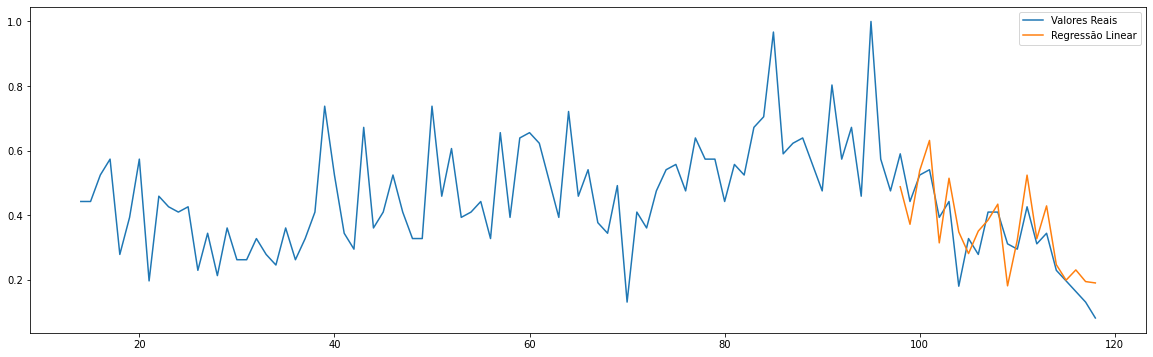

Erro quadrático
0.006065319467546289


In [1329]:
input_dim = menor3
tam = 30

dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
df_generated = generate_time_lags(dataframe, input_dim)
df_generated

val = df_generated[df_generated.shape[0]-tam-1:]
df_generated = df_generated[:-tam]
test_ratio = 0.2

lista = ['media_movel_casos']
for k in range(1, input_dim+1):
    lista.append(f"lag{k}")

X = df_generated[lista]
y = pd.DataFrame(data=[])
y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred']))

## *Realizando modelo para óbitos*

In [1330]:
dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
dataframe.head(5)

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,GUARATINGUETÁ,3518404.0,122505.0,0.000000,0.287895,0.0,0.066408,0.000000,0.252651,2021-02-21,0.081967,0.000000,0.176692,0.130435,0.167532,0.397790,0.0
1,1,GUARATINGUETÁ,3518404.0,122505.0,0.002660,0.012868,0.0,0.000000,0.002660,0.011293,2021-02-22,0.163934,0.142857,0.139098,0.130435,0.164937,0.287293,0.0
2,2,GUARATINGUETÁ,3518404.0,122505.0,0.004445,0.012917,0.0,0.001301,0.004445,0.011336,2021-02-23,0.163934,0.142857,0.142857,0.173913,0.179642,0.000000,0.0
3,3,GUARATINGUETÁ,3518404.0,122505.0,0.005253,0.005969,0.0,0.000158,0.005253,0.005239,2021-02-24,0.180328,0.142857,0.165414,0.173913,0.161188,0.535912,0.0
4,4,GUARATINGUETÁ,3518404.0,122505.0,0.006229,0.005969,0.0,0.000863,0.006229,0.005239,2021-02-25,0.163934,0.142857,0.154135,0.217391,0.152249,0.132597,0.0


### Seleção de atributos

In [1331]:
tam = 30
dataframe = dataframe.set_index(['data'])
dataframe.index = pd.to_datetime(dataframe.index)
dataframe = dataframe.drop(columns=['Município', 'Código IBGE', 'Populacao', 'Unnamed: 0'])
val = dataframe[dataframe.shape[0]-tam-1:]

dataframe = dataframe[:-tam]

test_ratio = 0.2
X = dataframe.drop(columns=['obito'])
y = pd.DataFrame(data=[])
y['obito'] = dataframe['obito']

val_ratio = test_ratio / (1 - test_ratio)

sel = fs.VarianceThreshold()
y = dataframe['obito']

test_ratio = 0.5

menor = 99

for i in range(11, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=test_ratio, shuffle=False)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    pred = linear.predict(X_test)
    score = mean_squared_error(y_test, pred)
    if score < menor:
        menor = score
        resul = X_sel
    print("Score com k = {} -> {}" .format(i, score))
    
print(resul[0])

Score com k = 11 -> 0.0312229112153168
Score com k = 10 -> 0.031723432097291775
Score com k = 9 -> 0.031042496659567254
Score com k = 8 -> 0.03983011084264635
Score com k = 7 -> 0.031002883569948802
Score com k = 6 -> 0.031422453087284925
Score com k = 5 -> 0.05128552443189482
Score com k = 4 -> 0.049747650098138065
Score com k = 3 -> 0.04951382473041525
Score com k = 2 -> 0.05090200214798872
Score com k = 1 -> 0.047541398180179745
[0.         0.2878951  0.06640815 0.         0.25265147 0.13043478
 0.16753172]


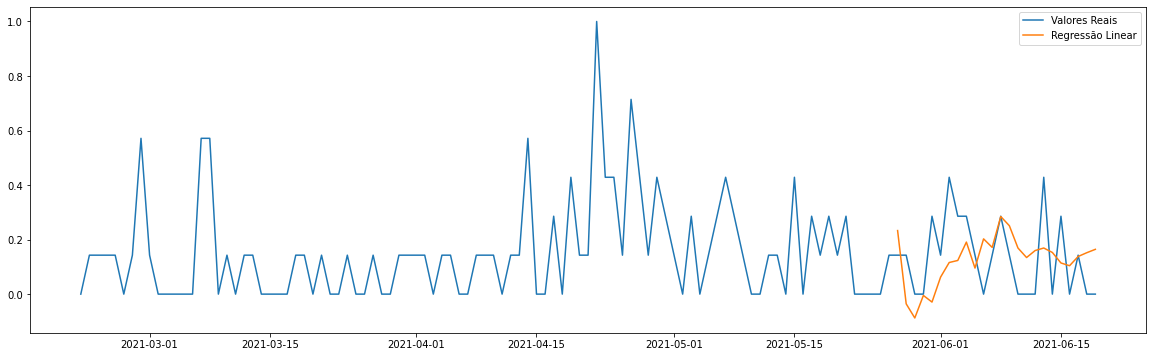

Erro quadrático
0.02480432180156941


In [1332]:
df = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
tam = 30
df = df.set_index(['data'])
df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Município', 'Código IBGE', 'Populacao'])

val = df[df.shape[0]-tam-1:]

df = df[:-tam]

test_ratio = 0.2

X = dataframe.drop(columns=['obito', 'media_isolamento'])
y = pd.DataFrame(data=[])
y['obito'] = df['obito']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['obito'], y_test['pred']))

### Utilizando a média deslocada dos últimos dias

In [1333]:
def generate_time_lags2(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_obitos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [1334]:
for dias in range(0, 15):
    
    menor = 99
    tam = 30
    test_ratio = 0.2
    
    dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
    df_generated = generate_time_lags2(dataframe, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_obitos', 'media_isolamento']
    
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['obito'] = df_generated['obito']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)
    
    h = mean_squared_error(y_test['obito'], y_test['pred'])
    if(h < menor):
        menor = h
        menor2 = dias

    print(str(dias) + " -> "+ str(mean_squared_error(y_test['obito'], y_test['pred'])))


0 -> 0.01697537790156187
1 -> 0.008311491977735973
2 -> 0.008046322574923595
3 -> 0.008263209325389043
4 -> 0.008420033262021873
5 -> 0.008063123090246782
6 -> 0.007972018583236025
7 -> 0.007695802552222044
8 -> 0.004705896414029385
9 -> 0.005445335021268236
10 -> 0.005449494948302987
11 -> 0.00563857944911863
12 -> 0.005459352805212234
13 -> 0.006380078457247722
14 -> 0.006835962855852317


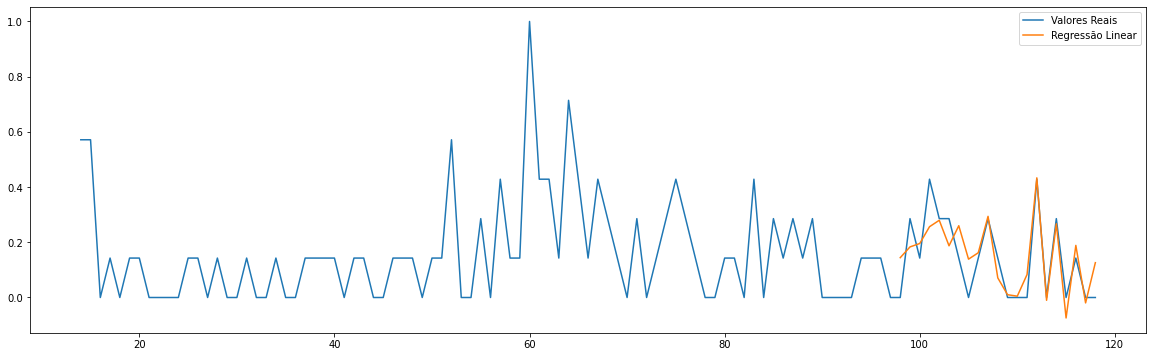

Erro quadrático
0.006835962855852317


In [1335]:
input_dim = menor2
tam = 30

dataframe = pd.read_csv('../normalizados/dados/'+cidade+'.csv')
df_generated = generate_time_lags2(dataframe, input_dim)
df_generated

val = df_generated[df_generated.shape[0]-tam-1:]
df_generated = df_generated[:-tam]
test_ratio = 0.2

lista = ['media_movel_obitos', 'media_isolamento']

for k in range(1, input_dim+1):
    lista.append(f"lag{k}")

X = df_generated[lista]
y = pd.DataFrame(data=[])
y['obito'] = df_generated['obito']

val_ratio = test_ratio / (1 - test_ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

pred2 = []

for i in y_pred:
    pred2.append(i[0])
    
y_test.insert(1, 'pred', pred2, True)

#print(y_test)

plt.figure(figsize=(20, 6))
plt.plot(y,label='Valores Reais')
plt.plot(y_test['pred'], label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

print("Erro quadrático")
print(mean_squared_error(y_test['obito'], y_test['pred']))

## Normalização utilizando standard

In [1336]:
dataframe = pd.read_csv('../Finais/'+cidade+'.csv')
dataframe

,Unnamed: 0,Unnamed: 0.1,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,0,GUARATINGUETÁ,3518404.0,122505.0,4847.0,5884.0,0.0,10731.0,3.956573,4.803069,2021-02-21,10.0,0.0,15.142857,0.428571,59.18,42.000000,0.0
1,1,1,GUARATINGUETÁ,3518404.0,122505.0,5005.0,263.0,0.0,5268.0,4.085548,0.214685,2021-02-22,15.0,1.0,13.714286,0.428571,59.09,40.333333,0.0
2,2,2,GUARATINGUETÁ,3518404.0,122505.0,5111.0,264.0,0.0,5375.0,4.172075,0.215501,2021-02-23,15.0,1.0,13.857143,0.571429,59.60,36.000000,0.0
3,3,3,GUARATINGUETÁ,3518404.0,122505.0,5159.0,122.0,0.0,5281.0,4.211257,0.099588,2021-02-24,16.0,1.0,14.714286,0.571429,58.96,44.083333,0.0
4,4,4,GUARATINGUETÁ,3518404.0,122505.0,5217.0,122.0,0.0,5339.0,4.258602,0.099588,2021-02-25,15.0,1.0,14.285714,0.714286,58.65,38.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,144,GUARATINGUETÁ,3518404.0,122505.0,63169.0,19710.0,2429.0,85308.0,51.564426,18.071915,2021-07-15,7.0,0.0,9.285714,0.142857,61.31,42.833333,0.0
145,145,145,GUARATINGUETÁ,3518404.0,122505.0,63564.0,20138.0,2838.0,86540.0,51.886862,18.755153,2021-07-16,7.0,0.0,8.857143,0.142857,55.90,37.000000,0.0
146,146,146,GUARATINGUETÁ,3518404.0,122505.0,64243.0,20438.0,2851.0,87532.0,52.441125,19.010653,2021-07-17,12.0,0.0,9.857143,0.142857,55.97,43.500000,0.0
147,147,147,GUARATINGUETÁ,3518404.0,122505.0,64243.0,20438.0,2851.0,87532.0,52.441125,19.010653,2021-07-18,7.0,0.0,9.857143,0.142857,54.16,42.000000,0.0


In [1337]:
scaler = StandardScaler()
norma = scaler.fit_transform(dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']))
df_scaled = pd.DataFrame(norma, columns=dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']).columns)
df_scaled[[ 'Município', 'Código IBGE', 'data']] = dataframe[[ 'Município', 'Código IBGE', 'data']]
df_scaled

,Unnamed: 0.1,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R,Município,Código IBGE,data
0,-1.720465,0.0,-1.243420,-0.700853,-0.323621,-1.106608,-1.243420,-0.700003,-1.389569,-0.773033,-1.174894,-0.765782,-1.847529,0.147469,0.0,GUARATINGUETÁ,3518404.0,2021-02-21
1,-1.697216,0.0,-1.234299,-1.589519,-0.323621,-1.337508,-1.234299,-1.547604,-0.985341,0.080166,-1.312616,-0.765782,-1.857250,-0.341361,0.0,GUARATINGUETÁ,3518404.0,2021-02-22
2,-1.673966,0.0,-1.228180,-1.589361,-0.323621,-1.332985,-1.228180,-1.547453,-0.985341,0.080166,-1.298844,-0.540730,-1.802166,-1.612321,0.0,GUARATINGUETÁ,3518404.0,2021-02-23
3,-1.650716,0.0,-1.225409,-1.611811,-0.323621,-1.336958,-1.225409,-1.568866,-0.904495,0.080166,-1.216211,-0.540730,-1.871291,0.758508,0.0,GUARATINGUETÁ,3518404.0,2021-02-24
4,-1.627467,0.0,-1.222061,-1.611811,-0.323621,-1.334507,-1.222061,-1.568866,-0.985341,0.080166,-1.257527,-0.315678,-1.904773,-1.025724,0.0,GUARATINGUETÁ,3518404.0,2021-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.627467,0.0,2.123319,1.485002,3.435217,2.045470,2.123319,1.751121,-1.632106,-0.773033,-1.739556,-1.215887,-1.617473,0.391885,0.0,GUARATINGUETÁ,3518404.0,2021-07-15
145,1.650716,0.0,2.146121,1.552668,4.068138,2.097542,2.146121,1.877334,-1.632106,-0.773033,-1.780873,-1.215887,-2.201794,-1.319023,0.0,GUARATINGUETÁ,3518404.0,2021-07-16
146,1.673966,0.0,2.185317,1.600097,4.088255,2.139470,2.185317,1.924532,-1.227878,-0.773033,-1.684467,-1.215887,-2.194233,0.587417,0.0,GUARATINGUETÁ,3518404.0,2021-07-17
147,1.697216,0.0,2.185317,1.600097,4.088255,2.139470,2.185317,1.924532,-1.632106,-0.773033,-1.684467,-1.215887,-2.389727,0.147469,0.0,GUARATINGUETÁ,3518404.0,2021-07-18


In [1338]:
for dias in range(0, 15):
    
    tam = 30
    test_ratio = 0.2
    

    df_generated = generate_time_lags(df_scaled, dias)
    
    val = df_generated[df_generated.shape[0]-tam-1:]
    df_generated = df_generated[:-tam]
    
    lista = ['media_movel_casos']
    for k in range(1, dias+1):
        lista.append(f"lag{k}")
    #print(lista)
    X = df_generated[lista]
    
    y = pd.DataFrame(data=[])
    y['diagnostico_covid19'] = df_generated['diagnostico_covid19']

    val_ratio = test_ratio / (1 - test_ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)

    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_pred = linear.predict(X_test)

    pred2 = []

    for i in y_pred:
        pred2.append(i[0])

    y_test.insert(1, 'pred', pred2, True)

    print(str(dias) + " -> "+ str(mean_squared_error(y_test['diagnostico_covid19'], y_test['pred'])))


0 -> 0.4297620594548359
1 -> 0.1810947399725771
2 -> 0.18873467021305645
3 -> 0.1972631803386612
4 -> 0.19320994735775915
5 -> 0.19190839578163543
6 -> 0.20974445635983124
7 -> 0.21028131163089805
8 -> 0.1198024187857036
9 -> 0.12417033016295886
10 -> 0.12824350667462317
11 -> 0.12685640420874694
12 -> 0.1389969541102596
13 -> 0.14404253921219462
14 -> 0.14751184882029275
